In [196]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns
import datetime

font_name = font_manager.FontProperties(fname='./malgun.ttf').get_name()
rc('font', family=font_name)

warnings.filterwarnings('ignore')

missing = pd.read_csv('./result/경찰청데이터_주소정리.csv', encoding='utf-8')

In [197]:
missing.columns

Index(['대상구분', '실종나이', '발생일시', '등록일시', '발견일시', '발생지역', '자치구'], dtype='object')

In [198]:
missing.head()

,대상구분,실종나이,발생일시,등록일시,발견일시,발생지역,자치구
0,아동,5,1963-01-01 09:00,2015-01-08 17:34,2017-10-19 12:00,서울특별시 중구 을지로,중구
1,아동,3,1977-10-15 12:00,2015-03-17 15:20,2017-02-16 00:00,서울특별시 은평구 진관동,은평구
2,아동,3,1977-08-01 12:00,2015-10-02 14:13,2020-10-06 00:00,서울특별시 중구 회현동1가,중구
3,아동,1,2007-12-31 10:00,2016-02-19 18:30,2017-06-26 17:00,서울특별시 노원구 월계동,노원구
4,아동,0,2009-02-01 12:00,2016-03-17 11:21,2018-07-25 00:00,서울특별시 영등포구 영등포동,영등포구


In [199]:
missing['dt'] = pd.to_datetime(missing['발생일시'], format='%Y-%m-%d %H:%M')

In [200]:
missing = missing[missing.dt.apply(lambda x: x.year) >= 2017]

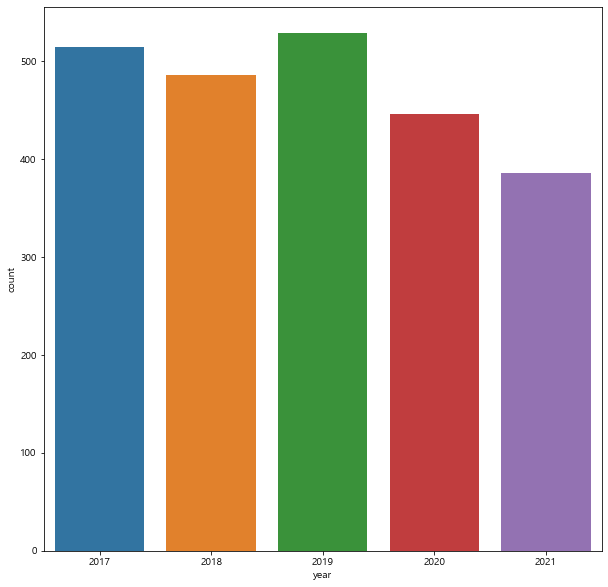

In [201]:
tmp_y = missing.groupby(missing.dt.apply(lambda x: x.year))[['대상구분']].count().reset_index()
tmp_y.columns = ['year', 'count']
plt.figure(figsize=(10, 10))
sns.barplot(x='year', y='count', data=tmp_y)
plt.show()

In [202]:
missing.dt.apply(lambda x: x.year).value_counts()

2019    529
2017    515
2018    486
2020    446
2021    386
Name: dt, dtype: int64

In [203]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 47 to 2615
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대상구분    2362 non-null   object        
 1   실종나이    2362 non-null   int64         
 2   발생일시    2362 non-null   object        
 3   등록일시    2362 non-null   object        
 4   발견일시    2362 non-null   object        
 5   발생지역    2362 non-null   object        
 6   자치구     2362 non-null   object        
 7   dt      2362 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 166.1+ KB


In [204]:
missing['실종나이'].value_counts()

10    385
9     372
6     362
7     346
8     313
5     214
4     141
3      88
0      83
2      47
1      11
Name: 실종나이, dtype: int64

In [206]:
missing[missing['실종나이'] == 0]['자치구'].value_counts()

관악구    74
금천구     2
강북구     1
구로구     1
강남구     1
강서구     1
종로구     1
성북구     1
은평구     1
Name: 자치구, dtype: int64

In [160]:
tmp = missing.groupby('실종나이')[['대상구분']].count().reset_index()

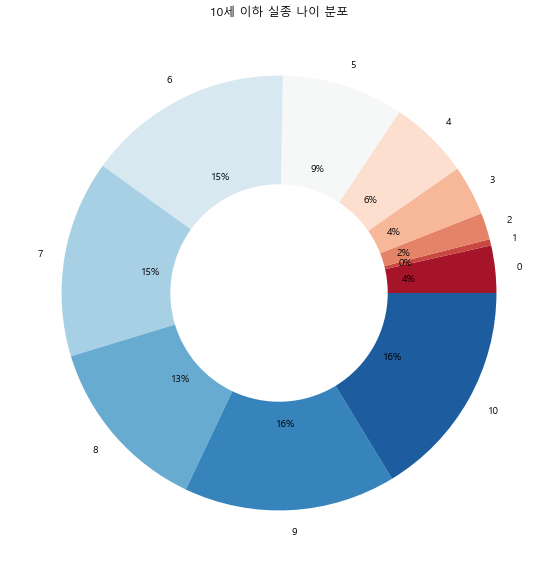

In [164]:
colors = sns.color_palette("RdBu", 11)
plt.figure(figsize=(10, 10))
plt.title('10세 이하 실종 나이 분포')
plt.pie(tmp['대상구분'], labels=tmp['실종나이'], colors=colors, autopct='%.0f%%', wedgeprops=dict(width=0.5))
plt.savefig('./result/10세 이하 실종 나이 분포.png')
plt.show()

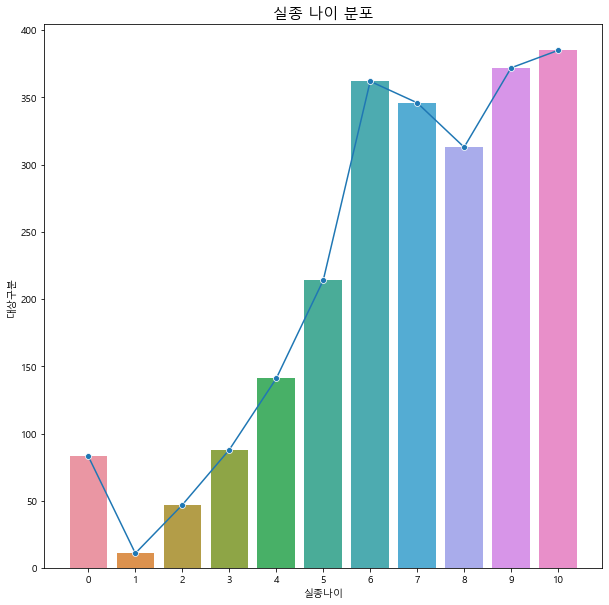

In [165]:
plt.figure(figsize=(10, 10))
sns.barplot(x='실종나이', y='대상구분', data=tmp)
p = sns.lineplot(x='실종나이', y='대상구분', data=tmp, marker='o')
p.set_title('실종 나이 분포', fontsize=15)
plt.savefig('./result/10세 이하 실종 나이 분포 bar.png')
plt.show()

In [12]:
grouped = missing.groupby('자치구')[['대상구분']].count().reset_index()

In [13]:
grouped.columns = ['자치구', '실종 아동 신고 건수']

In [14]:
grouped.sort

,자치구,실종 아동 신고 건수
0,강남구,92
1,강동구,81
2,강북구,73
3,강서구,83
4,관악구,215
5,광진구,82
6,구로구,101
7,금천구,150
8,노원구,68
9,도봉구,65


In [214]:
import folium
import json

geo_path = './seoul_geo.json'
try : 
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except : 
    geo_data = json.load(open(geo_path, encdoing='utf-8-sig'))

In [215]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10)
fmap=folium.Choropleth(geo_data = geo_data,
               data = grouped,
               columns = ['자치구', '실종 아동 신고 건수'],
               fill_color = 'YlOrRd',
               key_on='feature.properties.name').add_to(map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)

# Save to html
map.save('./result/서울시 구별 실종아동 신고 건수 with 0.html')
display(map)

In [168]:
grouped_sorted = grouped.sort_values(by='실종 아동 신고 건수', ascending=False)

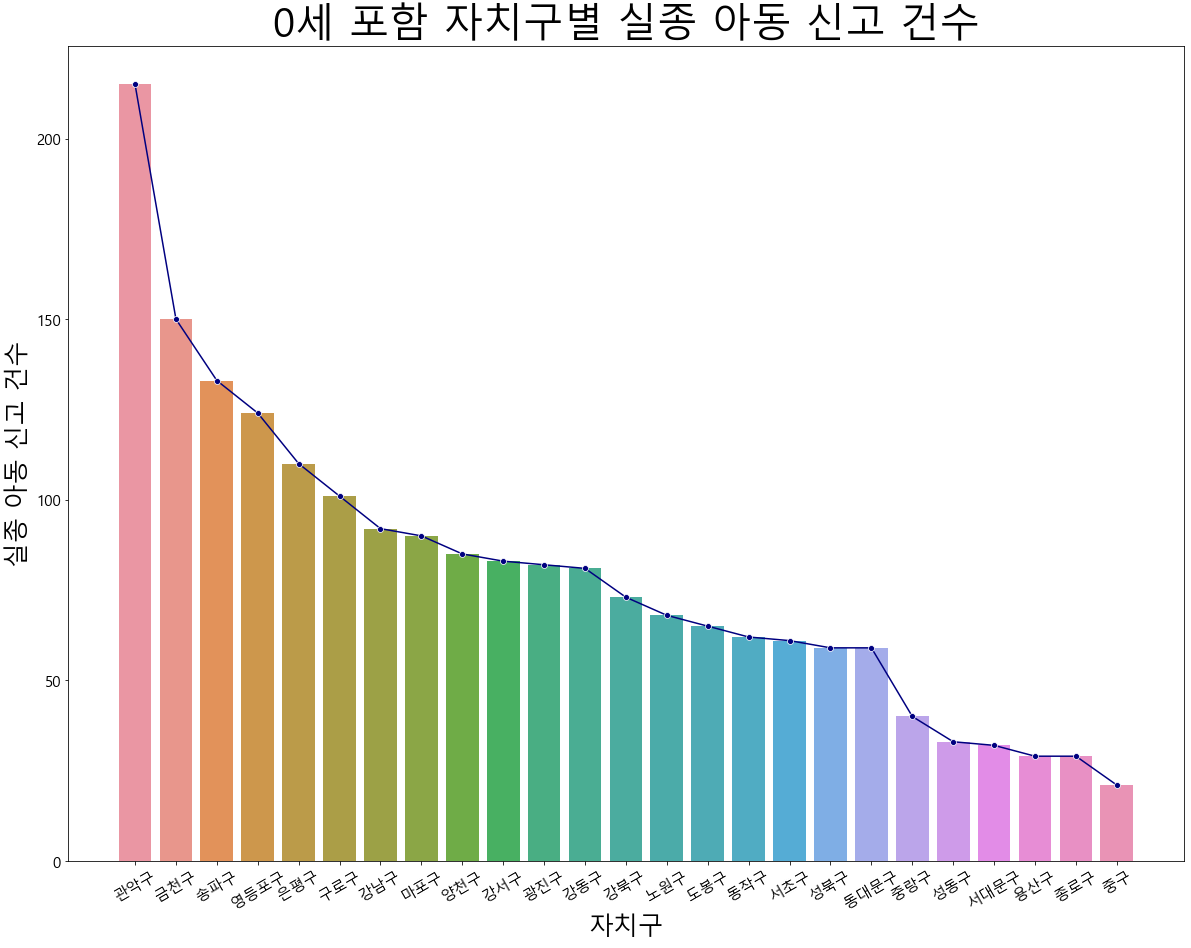

In [170]:
plt.figure(figsize=(20, 15))
plt.title('0세 포함 자치구별 실종 아동 신고 건수', fontsize=40)
plt.xticks(rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('자치구', fontsize=25)
plt.ylabel('실종 아동 신고 건수', fontsize=25)
sns.barplot('자치구', '실종 아동 신고 건수', data = grouped_sorted)
sns.lineplot('자치구', '실종 아동 신고 건수', data = grouped_sorted, color='navy', marker='o')
plt.savefig('./result/자치구별 실종 아동 신고 건수 with 0.png')

In [171]:
grouped_sorted.describe()

,실종 아동 신고 건수
count,25.00000
mean,79.08000
std,43.90038
min,21.00000
25%,59.00000
50%,73.00000
75%,92.00000
max,215.00000


In [172]:
grouped_sorted.head(10)

,자치구,실종 아동 신고 건수
4,관악구,215
7,금천구,150
17,송파구,133
19,영등포구,124
21,은평구,110
6,구로구,101
0,강남구,92
12,마포구,90
18,양천구,85
3,강서구,83


### 관악구 연령 확인

In [173]:
missing_관악 = missing[missing['자치구'] == '관악구']

In [174]:
missing_관악['실종나이'].value_counts()

0     74
6     38
9     22
7     21
8     20
5     18
10    13
4     11
3      6
2      3
1      2
Name: 실종나이, dtype: int64

In [175]:
tmp_관악 = missing_관악.groupby('실종나이')[['대상구분']].count().reset_index()

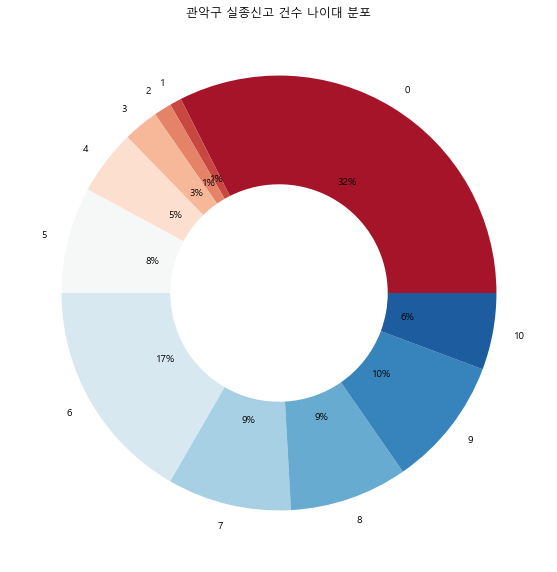

In [193]:
colors = sns.color_palette("RdBu", 11)
plt.figure(figsize=(10, 10))
plt.pie(tmp_관악['대상구분'], labels=tmp_관악['실종나이'], colors=colors, autopct='%.0f%%', wedgeprops=dict(width=0.5))
plt.title('관악구 실종신고 건수 나이대 분포')
plt.savefig('./result/관악구 실종신고 건수 나이대 분포.png')
plt.show()

In [177]:
missing_관악.columns

Index(['대상구분', '실종나이', '발생일시', '등록일시', '발견일시', '발생지역', '자치구', 'dt'], dtype='object')

In [178]:
print(missing_관악[['발생지역', '실종나이']].value_counts()) 
# 발생지역 서울특별시 관악구 난곡로26길 : 실종나이 0세가 전부 => 주사랑공동체교회 : 베이비박스 운영
# 0세 아동은 제외해야 더 정확한 결과를 얻을 수 있을 것

발생지역              실종나이
서울특별시 관악구 난곡로26길  0       71
서울특별시 관악구 신림동     8        6
                  6        4
                  5        3
서울특별시 관악구 봉천동     9        3
                          ..
서울특별시 관악구 국회단지길   6        1
서울특별시 관악구 국회단지7길  7        1
서울특별시 관악구 구암7길    2        1
서울특별시 관악구 광신길     5        1
서울특별시 관악구 호암로20길  0        1
Length: 137, dtype: int64


## 0세 제외

In [179]:
missing = missing[missing['실종나이'] != 0]

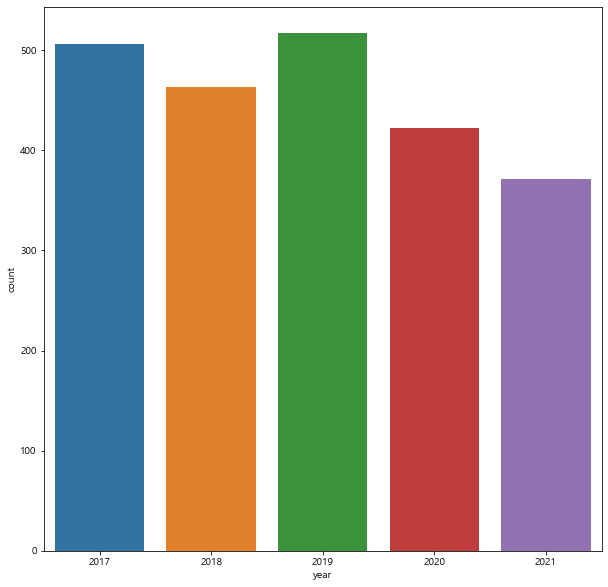

In [180]:
tmp_y2 = missing.groupby(missing.dt.apply(lambda x: x.year))[['대상구분']].count().reset_index()
tmp_y2.columns = ['year', 'count']
plt.figure(figsize=(10, 10))
sns.barplot(x='year', y='count', data=tmp_y2)
plt.show()

In [181]:
grouped_wth0 = missing.groupby('자치구')[['대상구분']].count().reset_index()

In [182]:
tmp_wth0 = missing.groupby('실종나이')[['대상구분']].count().reset_index()

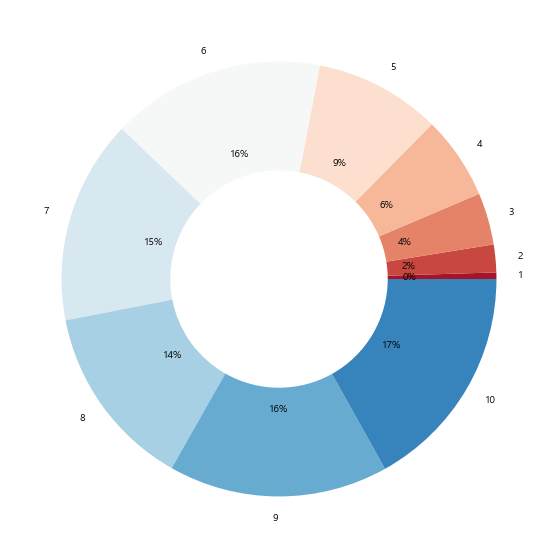

In [183]:
colors = sns.color_palette("RdBu", 11)
plt.figure(figsize=(10, 10))
plt.pie(tmp_wth0['대상구분'], labels=tmp_wth0['실종나이'], colors=colors, autopct='%.0f%%', wedgeprops=dict(width=0.5))
plt.show()

In [184]:
grouped_wth0 = missing.groupby('자치구')[['대상구분']].count().reset_index()

In [185]:
grouped_wth0.columns = ['자치구', '실종 아동 신고 건수']

In [186]:
grouped_wth0.to_csv('./result/구별 신고 건수.csv', index=False)

In [212]:
import folium
import json

geo_path = './seoul_geo.json'
try : 
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except : 
    geo_data = json.load(open(geo_path, encdoing='utf-8-sig'))

In [213]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10)
fmap=folium.Choropleth(geo_data = geo_data,
               data = grouped_wth0,
               columns = ['자치구', '실종 아동 신고 건수'],
               fill_color = 'YlOrRd',
               key_on='feature.properties.name').add_to(map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)

# Save to html
map.save('./result/서울시 구별 실종아동 신고 건수.html')
display(map)

In [189]:
grouped_wth0.describe()

,실종 아동 신고 건수
count,25.000000
mean,91.160000
std,41.489637
min,27.000000
25%,68.000000
50%,87.000000
75%,124.000000
max,165.000000


In [190]:
grouped_wth0_sorted = grouped_wth0.sort_values(by='실종 아동 신고 건수', ascending=False)

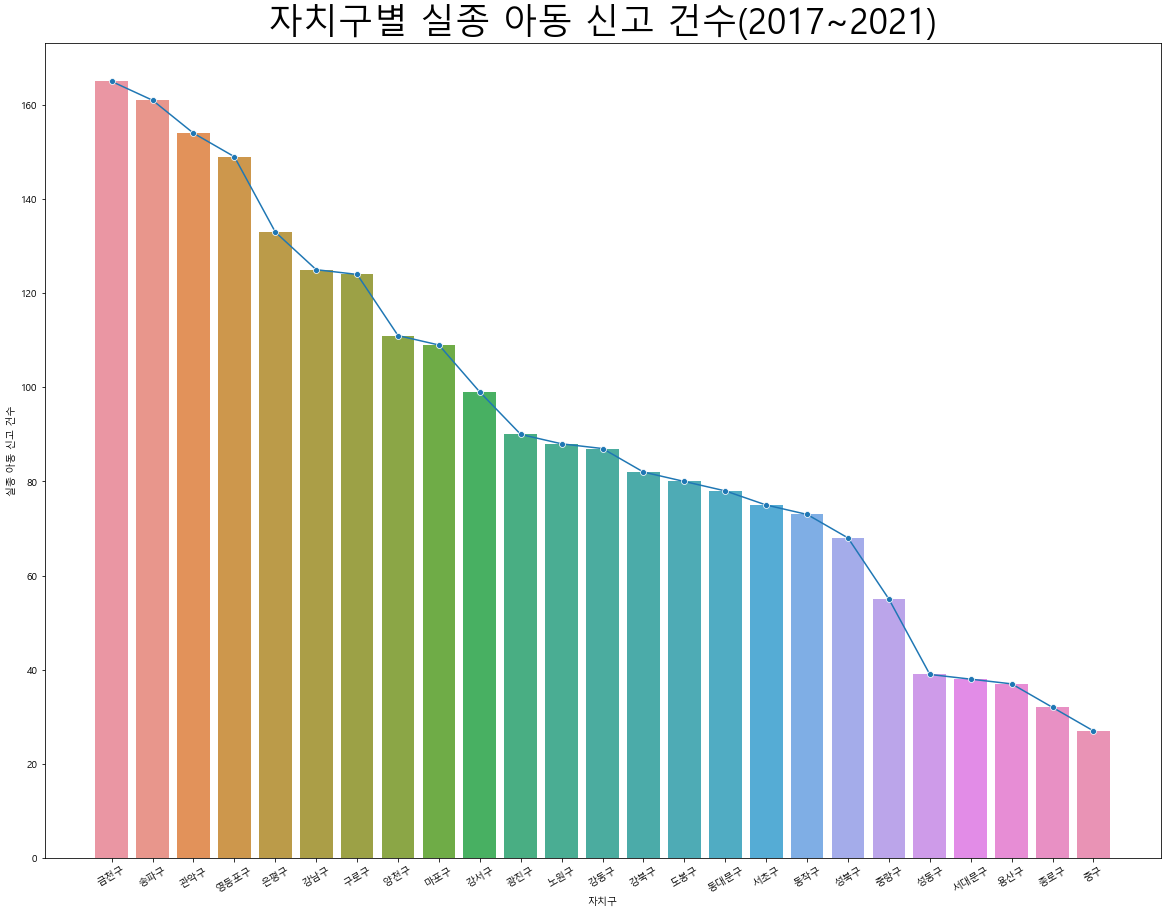

In [211]:
plt.figure(figsize=(20, 15))
p = sns.barplot(x='자치구', y='실종 아동 신고 건수', data=grouped_wth0_sorted)
sns.lineplot(x='자치구', y='실종 아동 신고 건수', data=grouped_wth0_sorted, marker='o')
p.set_title('자치구별 실종 아동 신고 건수(2017~2021)', fontsize=35)
plt.xticks(rotation=30)
plt.savefig('./result/자치구별 실종 아동 신고 건수.png')
plt.show()

In [40]:
missing.발생일시

38      2017-01-02 16:30
40      2017-01-04 10:50
41      2017-01-06 15:00
42      2017-01-06 17:50
43      2017-01-07 13:00
              ...       
2209    2021-04-14 22:22
2210    2021-04-02 18:16
2211    2021-05-04 00:00
2212    2021-07-09 13:00
2213    2021-10-24 14:00
Name: 발생일시, Length: 1894, dtype: object

In [41]:
from datetime import *
missing['hour'] = missing.발생일시.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M").hour)

In [42]:
missing['day'] = missing.dt.apply(lambda x: x.weekday())

In [43]:
missing_new = missing.groupby(['자치구', 'day'])[['대상구분']].count().reset_index()

In [44]:
missing_new.columns = ['자치구', 'day', '신고건수']

In [45]:
missing_new.to_csv('./result/자치구 요일별 신고건수.csv', index=False)

In [46]:
tmp_hour = missing.groupby('hour')[['대상구분']].count().reset_index()

In [47]:
tmp_hour.columns = ['hour', 'count']

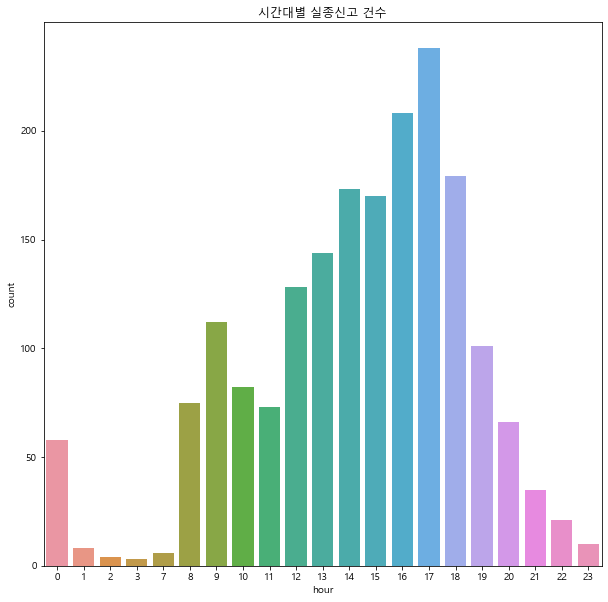

In [48]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='hour', y='count', data=tmp_hour)
h.set_title('시간대별 실종신고 건수')
plt.savefig('./result/시간대별 실종신고 건수.png')
plt.show()

### 0시 ~ 4시, 23시 실종건수?

In [49]:
check = missing[(missing['hour'] == 0) | (missing['hour'] == 1) | (missing['hour'] == 2) | (missing['hour'] == 3) | (missing['hour'] == 4) | (missing['hour'] == 23)]

In [50]:
check_g = check.groupby('실종나이')[['대상구분']].count().reset_index()
check_g.columns = ['실종나이', 'count']

<AxesSubplot:xlabel='실종나이', ylabel='count'>

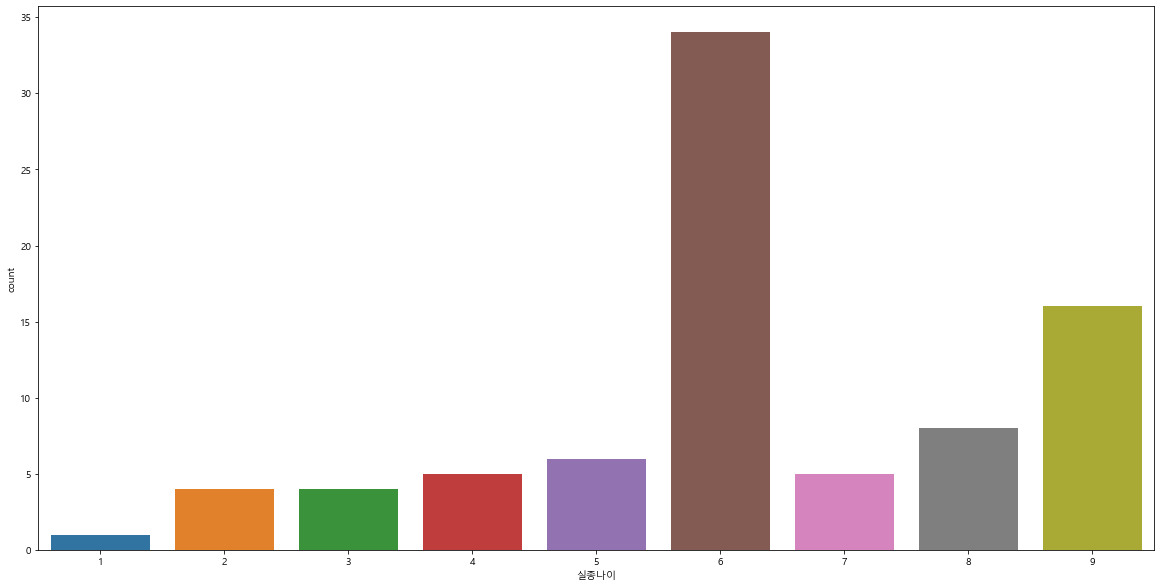

In [51]:
plt.figure(figsize=(20, 10))
sns.barplot(x='실종나이', y='count', data=check_g)

## 나이대별 시간대

In [52]:
pd.set_option('display.max_rows', None)
check_1 = missing[['실종나이', 'hour']].value_counts().to_frame().reset_index()
check_1.columns = ['실종나이', 'hour', 'count']

<AxesSubplot:xlabel='hour', ylabel='count'>

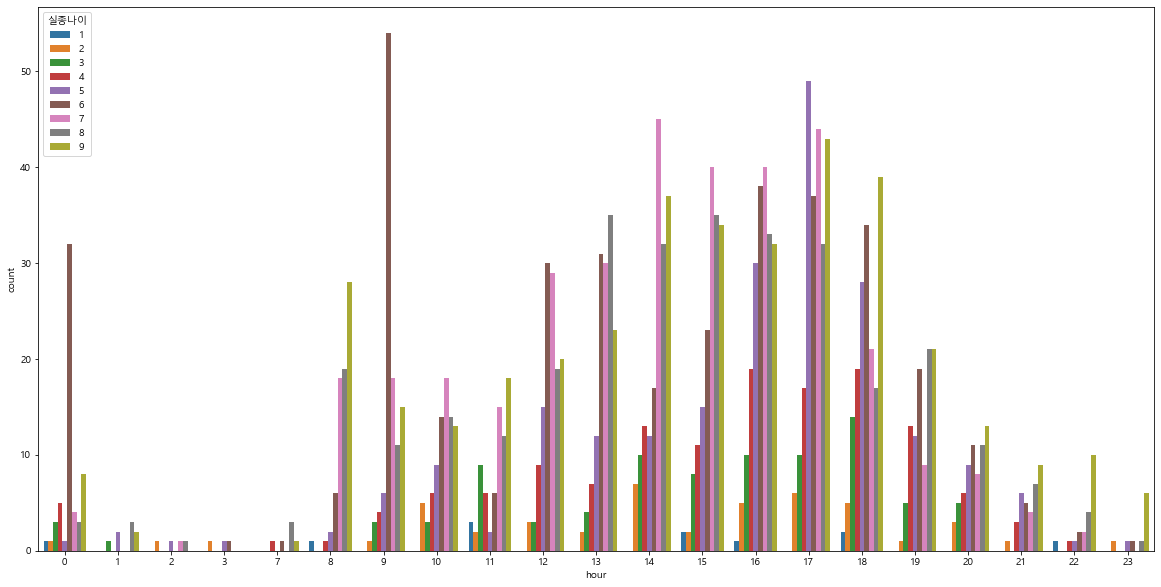

In [53]:
plt.figure(figsize=(20, 10))
sns.barplot(x='hour', y='count', hue='실종나이', data=check_1)

In [54]:
missing['mon'] = missing.발생일시.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M").month)

In [55]:
tmp_mon = missing.groupby('mon')[['대상구분']].count().reset_index()

In [56]:
tmp_mon.columns = ['mon', 'count']

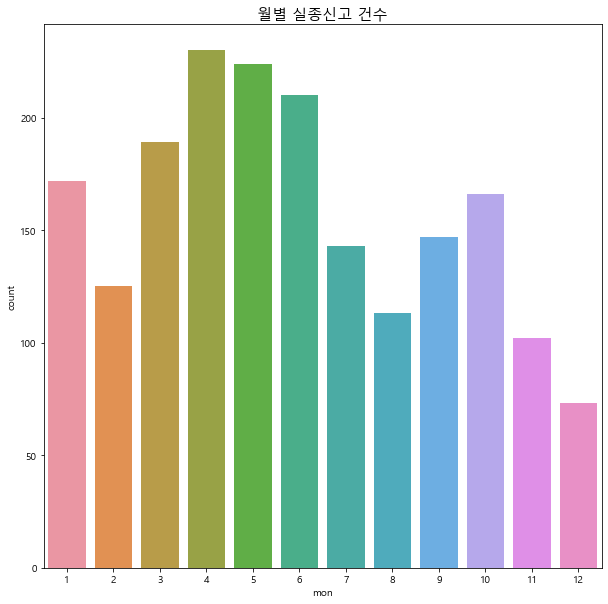

In [57]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='mon', y='count', data=tmp_mon)
h.set_title('월별 실종신고 건수', fontsize=15)
plt.savefig('./result/월별 실종신고 건수.png')
plt.show()

In [58]:
missing['day'] = missing['dt'].apply(lambda x: x.weekday())

In [59]:
tmp_day = missing.groupby('day')[['대상구분']].count().reset_index()

In [60]:
tmp_day.columns = ['day', 'count']

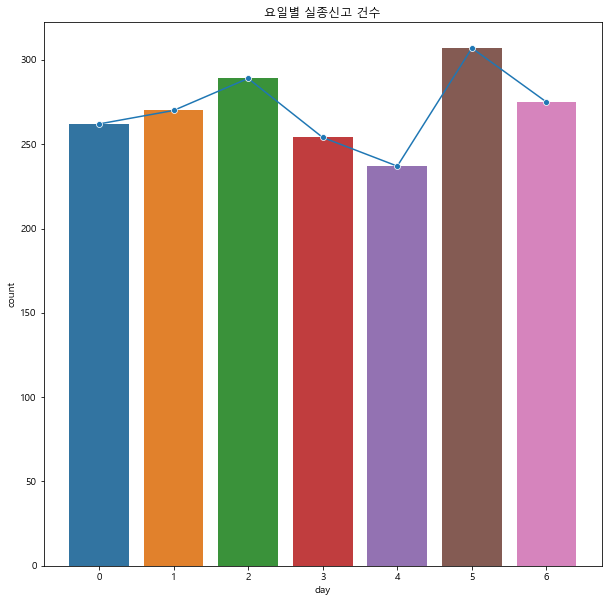

In [61]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='day', y='count', data=tmp_day)
sns.lineplot(x='day', y='count', data=tmp_day, marker='o')
h.set_title('요일별 실종신고 건수')
plt.show()

In [62]:
tmp_day.sort_values(by='count', ascending=False)

,day,count
5,5,307
2,2,289
6,6,275
1,1,270
0,0,262
3,3,254
4,4,237


## 요일별 시간대

In [63]:
tmp_0 = missing[missing['day'] == 0]
tmp_1 = missing[missing['day'] == 1]
tmp_2 = missing[missing['day'] == 2]
tmp_3 = missing[missing['day'] == 3]
tmp_4 = missing[missing['day'] == 4]
tmp_5 = missing[missing['day'] == 5]
tmp_6 = missing[missing['day'] == 6]

### 월요일

In [64]:
tmp_0_g = tmp_0.groupby('hour')[['대상구분']].count().reset_index()

In [65]:
tmp_0_g.columns = ['hour', 'count']

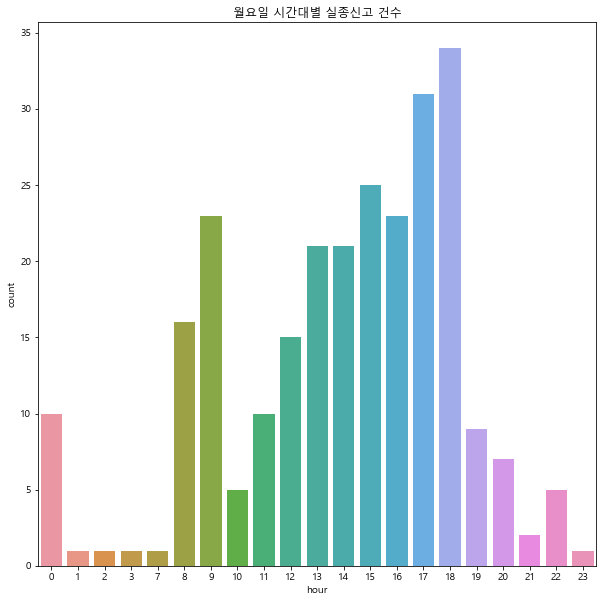

In [66]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='hour', y='count', data=tmp_0_g)
h.set_title('월요일 시간대별 실종신고 건수')
plt.show()

### 화요일

In [67]:
tmp_1_g = tmp_1.groupby('hour')[['대상구분']].count().reset_index()

In [68]:
tmp_1_g.columns = ['hour', 'count']

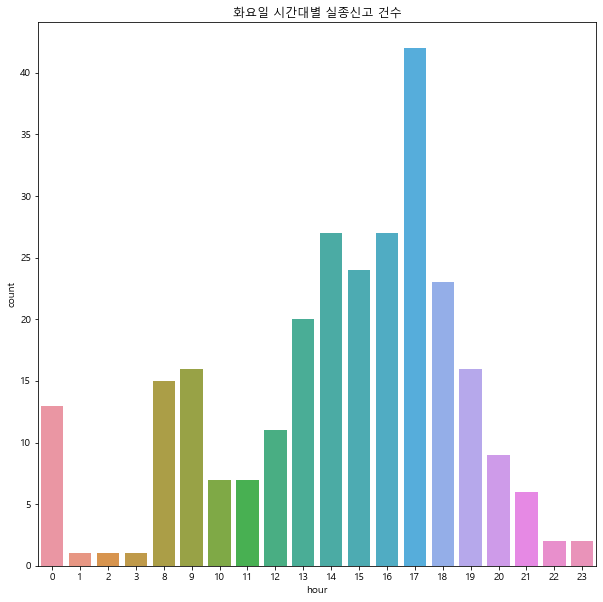

In [69]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='hour', y='count', data=tmp_1_g)
h.set_title('화요일 시간대별 실종신고 건수')
plt.show()

### 수요일

In [70]:
tmp_2_g = tmp_2.groupby('hour')[['대상구분']].count().reset_index()

In [71]:
tmp_2_g.columns = ['hour', 'count']

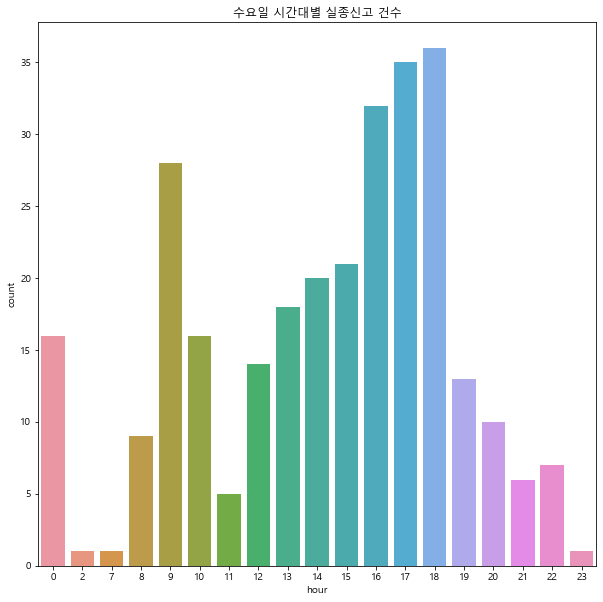

In [72]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='hour', y='count', data=tmp_2_g)
h.set_title('수요일 시간대별 실종신고 건수')
plt.show()

### 목요일

In [73]:
tmp_3_g = tmp_3.groupby('hour')[['대상구분']].count().reset_index()

In [74]:
tmp_3_g.columns = ['hour', 'count']

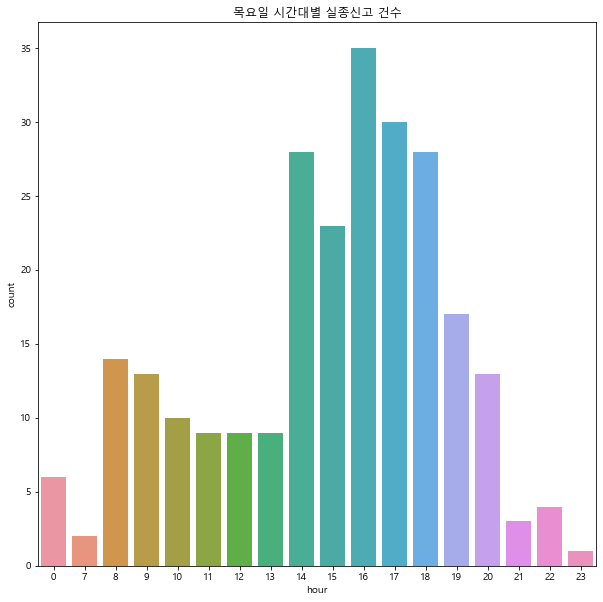

In [75]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='hour', y='count', data=tmp_3_g)
h.set_title('목요일 시간대별 실종신고 건수')
plt.show()

### 금요일

In [76]:
tmp_4_g = tmp_4.groupby('hour')[['대상구분']].count().reset_index()

In [77]:
tmp_4_g.columns = ['hour', 'count']

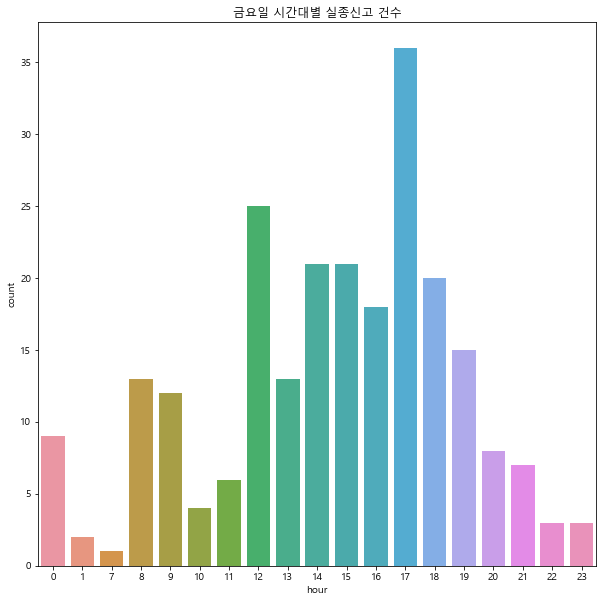

In [78]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='hour', y='count', data=tmp_4_g)
h.set_title('금요일 시간대별 실종신고 건수')
plt.show()

### 토요일

In [79]:
tmp_5_g = tmp_5.groupby('hour')[['대상구분']].count().reset_index()

In [80]:
tmp_5_g.columns = ['hour', 'count']

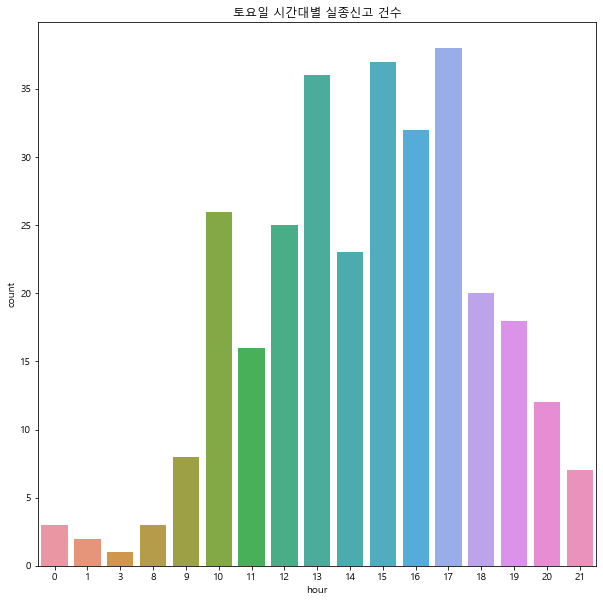

In [81]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='hour', y='count', data=tmp_5_g)
h.set_title('토요일 시간대별 실종신고 건수')
plt.show()

### 일요일

In [82]:
tmp_6_g = tmp_6.groupby('hour')[['대상구분']].count().reset_index()

In [83]:
tmp_6_g.columns = ['hour', 'count']

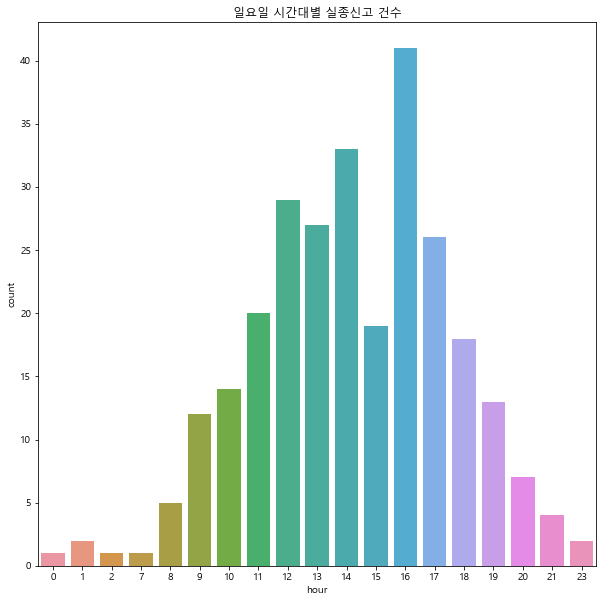

In [84]:
plt.figure(figsize=(10, 10))
h = sns.barplot(x='hour', y='count', data=tmp_6_g)
h.set_title('일요일 시간대별 실종신고 건수')
plt.show()

## 데이터 정리

In [85]:
pd.set_option('display.max_rows', 15)
missing

,대상구분,실종나이,발생일시,등록일시,발견일시,발생지역,자치구,dt,hour,day,mon
38,아동,8,2017-01-02 16:30,2017-01-02 20:29,2017-01-02 20:40,서울특별시 마포구 월드컵북로,마포구,2017-01-02 16:30:00,16,0,1
40,아동,9,2017-01-04 10:50,2017-01-04 12:52,2017-01-04 13:30,서울 도봉구 방학동,도봉구,2017-01-04 10:50:00,10,2,1
41,아동,5,2017-01-06 15:00,2017-01-06 16:04,2017-01-06 16:39,서울특별시 관악구 관악로,관악구,2017-01-06 15:00:00,15,4,1
42,아동,7,2017-01-06 17:50,2017-01-06 20:08,2017-01-06 20:20,서울특별시 강북구 미아동,강북구,2017-01-06 17:50:00,17,4,1
43,아동,7,2017-01-07 13:00,2017-01-07 21:17,2017-01-07 23:10,서울특별시 강남구 광평로51길,강남구,2017-01-07 13:00:00,13,5,1
...,...,...,...,...,...,...,...,...,...,...,...
2209,아동,8,2021-04-14 22:22,2021-04-14 22:37,2021-04-14 22:30,서울특별시 양천구 신정동,양천구,2021-04-14 22:22:00,22,2,4
2210,아동,9,2021-04-02 18:16,2021-04-02 19:32,2021-04-02 19:20,서울특별시 양천구 목동서로,양천구,2021-04-02 18:16:00,18,4,4
2211,아동,5,2021-05-04 00:00,2021-07-02 13:49,2021-07-02 14:00,서울특별시 양천구 신정1동,양천구,2021-05-04 00:00:00,0,1,5
2212,아동,6,2021-07-09 13:00,2021-07-09 13:59,2021-07-09 14:10,서울특별시 동작구 상도동 신상도초등학교,동작구,2021-07-09 13:00:00,13,4,7


In [86]:
import requests; from urllib.parse import urlparse
import pandas as pd
import geopandas

In [87]:
missing.reset_index(inplace=True)
missing.drop(['index'], axis=1, inplace=True)

In [90]:
missing

,대상구분,실종나이,발생일시,등록일시,발견일시,발생지역,자치구,dt,hour,day,mon,행정동
0,아동,8,2017-01-02 16:30,2017-01-02 20:29,2017-01-02 20:40,서울특별시 마포구 월드컵북로,마포구,2017-01-02 16:30:00,16,0,1,서교동
1,아동,9,2017-01-04 10:50,2017-01-04 12:52,2017-01-04 13:30,서울 도봉구 방학동,도봉구,2017-01-04 10:50:00,10,2,1,방학동
2,아동,5,2017-01-06 15:00,2017-01-06 16:04,2017-01-06 16:39,서울특별시 관악구 관악로,관악구,2017-01-06 15:00:00,15,4,1,봉천동
3,아동,7,2017-01-06 17:50,2017-01-06 20:08,2017-01-06 20:20,서울특별시 강북구 미아동,강북구,2017-01-06 17:50:00,17,4,1,미아동
4,아동,7,2017-01-07 13:00,2017-01-07 21:17,2017-01-07 23:10,서울특별시 강남구 광평로51길,강남구,2017-01-07 13:00:00,13,5,1,수서동
...,...,...,...,...,...,...,...,...,...,...,...,...
1889,아동,8,2021-04-14 22:22,2021-04-14 22:37,2021-04-14 22:30,서울특별시 양천구 신정동,양천구,2021-04-14 22:22:00,22,2,4,NaN
1890,아동,9,2021-04-02 18:16,2021-04-02 19:32,2021-04-02 19:20,서울특별시 양천구 목동서로,양천구,2021-04-02 18:16:00,18,4,4,NaN
1891,아동,5,2021-05-04 00:00,2021-07-02 13:49,2021-07-02 14:00,서울특별시 양천구 신정1동,양천구,2021-05-04 00:00:00,0,1,5,NaN
1892,아동,6,2021-07-09 13:00,2021-07-09 13:59,2021-07-09 14:10,서울특별시 동작구 상도동 신상도초등학교,동작구,2021-07-09 13:00:00,13,4,7,NaN


In [125]:
for i, add in enumerate(missing['발생지역']):
    address = add
    url = "https://dapi.kakao.com/v2/local/search/address.json?&query=" + address
    result = requests.get(urlparse(url).geturl(),
                          headers={"Authorization":"KakaoAK a97641d731b111c2b305a9ee34cd8fe7"})
    json_obj = result.json()
    try:
        try:
            missing.loc[i, '행정동'] = json_obj['documents'][0]['road_address']['region_3depth_name']
        except:
            missing.loc[i, '행정동'] = json_obj['documents'][0]['address']['region_3depth_name']
    except:
        missing.loc[i, '행정동'] == np.NaN

In [138]:
lst = missing[missing['행정동'].isnull()].index

In [139]:
len(lst)

177

In [140]:
missing.loc[12, '행정동'] = '마천동'
missing.loc[24, '행정동'] = '가양동'
missing.loc[60, '행정동'] = '구로동'
missing.loc[71, '행정동'] = '잠실동'
missing.loc[73, '행정동'] = '고덕동'
missing.loc[81, '행정동'] = '사당1동'
missing.loc[74, '행정동'] = '이촌동'
missing.loc[84, '행정동'] = '가양4동'
missing.loc[94, '행정동'] = '역촌동'
missing.loc[1871, '행정동'] = '개봉동'
missing.loc[1892, '행정동'] = '상도동'
missing.loc[1893, '행정동'] = '신월동'
missing.loc[1751, '행정동'] = '암사동'
missing.loc[122, '행정동'] = '시흥동'
missing.loc[136, '행정동'] = '수유동'
missing.loc[1839, '행정동'] = '독산4동'
missing.loc[111, '행정동'] = '독산동'
missing.loc[138, '행정동'] = '진관동'
missing.loc[1754, '행정동'] = '신대방동'
missing.loc[149, '행정동'] = '성산동'
missing.loc[143, '행정동'] = '독산동'

In [141]:
missing.iloc[lst, :]

,대상구분,실종나이,발생일시,등록일시,발견일시,발생지역,자치구,dt,hour,day,mon,행정동
20,아동,1,2017-01-29 08:00,2017-01-29 10:57,2017-01-30 03:41,서울 광진구 소재,광진구,2017-01-29 08:00:00,8,6,1,NaN
26,아동,6,2017-02-04 17:30,2017-02-04 19:42,2017-02-04 19:50,서울 도봉구 해덕로,도봉구,2017-02-04 17:30:00,17,5,2,NaN
102,아동,5,2017-03-25 15:00,2017-03-25 15:31,2017-03-25 15:44,서울특별시 은평구 증가로,은평구,2017-03-25 15:00:00,15,5,3,NaN
152,아동,7,2017-04-20 14:30,2017-04-21 02:33,2017-04-21 04:30,서울 서대문구 소재,서대문구,2017-04-20 14:30:00,14,3,4,NaN
156,아동,4,2017-04-23 14:40,2017-04-23 15:30,2017-04-23 16:20,서울 송파구 소재,송파구,2017-04-23 14:40:00,14,6,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1721,아동,4,2021-03-24 17:00,2021-03-24 17:34,2021-03-24 17:35,서울 광진구 소재,광진구,2021-03-24 17:00:00,17,2,3,NaN
1722,아동,5,2021-10-29 16:20,2021-10-29 17:07,2021-10-29 16:30,서울 송파구 소재,송파구,2021-10-29 16:20:00,16,4,10,NaN
1723,아동,9,2021-10-31 17:00,2021-10-31 19:44,2021-10-31 21:30,서울 강남구 소재,강남구,2021-10-31 17:00:00,17,6,10,NaN
1750,아동,9,2021-04-25 17:50,2021-04-25 18:30,2021-04-25 19:30,서울 마포대교 부근,마포구,2021-04-25 17:50:00,17,6,4,NaN


In [99]:
missing.to_csv('./result/경찰청데이터_주소정리2.csv', sep=',', index=False)